```{contents}
```

## Performance metrics

## **XGBRegressor** 

Regression predicts continuous outputs. Evaluation focuses on error magnitude, variance explained, and correlation between predicted vs actual.

1. **Mean Squared Error (MSE)**

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat y_i)^2
$$

* Penalizes larger errors heavily (quadratic).
* Lower is better.
* Often used as the default loss in XGBRegressor.

---

2. **Root Mean Squared Error (RMSE)**

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* Same as MSE but in original target units.
* Easier to interpret when target values are meaningful (e.g., prices, temperatures).

---

3. **Mean Absolute Error (MAE)**

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i - \hat y_i|
$$

* More robust to outliers than MSE.
* Measures average magnitude of errors.

---

4. **R-squared (Coefficient of Determination, $R^2$)**

$$
R^2 = 1 - \frac{\sum (y_i - \hat y_i)^2}{\sum (y_i - \bar y)^2}
$$

* Measures variance explained by the model.
* $R^2=1$: perfect fit, $R^2=0$: baseline (mean-only), negative: worse than baseline.

---

5. **Mean Absolute Percentage Error (MAPE)**

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^n \left|\frac{y_i - \hat y_i}{y_i}\right|
$$

* Expresses error in percentage terms.
* Sensitive to zero or very small $y_i$.

---

---

## **XGBClassifier**

Classification predicts discrete labels. Metrics depend on **binary** vs **multiclass**.

---

#### Binary classification


1. **Accuracy**


$$
\text{Accuracy} = \frac{\text{correct predictions}}{\text{total predictions}}
$$

* Simple but can be misleading on imbalanced datasets.

---

2. **Precision**

$$
\text{Precision} = \frac{TP}{TP+FP}
$$

* Of predicted positives, how many are correct?
* High precision means fewer false alarms.

---

3. **Recall (Sensitivity, TPR)**

$$
\text{Recall} = \frac{TP}{TP+FN}
$$

* Of actual positives, how many did we catch?
* High recall means fewer misses.

---

4. **F1 Score**

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* Harmonic mean of precision and recall.
* Useful when classes are imbalanced.

---

5. **AUC-ROC (Area Under ROC Curve)**

* ROC: plots True Positive Rate vs False Positive Rate at all thresholds.
* AUC close to 1 → strong separation between classes.
* Threshold-independent.

---

6. **Log Loss (Cross-Entropy Loss)**

$$
\text{LogLoss} = -\frac{1}{n}\sum \big[ y_i\log(p_i) + (1-y_i)\log(1-p_i)\big]
$$

* Measures probability calibration.
* Strong penalty for confident wrong predictions.

---

#### Multiclass classification

1. **Accuracy** (same as binary).
2. **Log Loss** (generalized to multiclass softmax).
3. **Macro / Micro Precision, Recall, F1**

   * **Macro**: unweighted mean across classes.
   * **Micro**: aggregates over all instances.
4. **Cohen’s Kappa** – agreement measure, adjusts for chance.
5. **AUC-ROC (One-vs-Rest)** for multiclass.

---

**Summary:**

* For **XGBRegressor**, common metrics = MSE, RMSE, MAE, R².
* For **XGBClassifier**, common metrics = Accuracy, Precision, Recall, F1, AUC, Log Loss.
* Choice depends on business goals: do you want to minimize error magnitude, maximize variance explained, reduce false negatives, or improve probability calibration?




--- XGBRegressor Evaluation ---
MSE: 2723.75
RMSE: 52.19
MAE: 41.34
R²: 0.86

--- XGBClassifier Evaluation ---
Accuracy: 0.95
Precision: 0.97
Recall: 0.88
F1 Score: 0.92
AUC-ROC: 0.98
Log Loss: 0.20


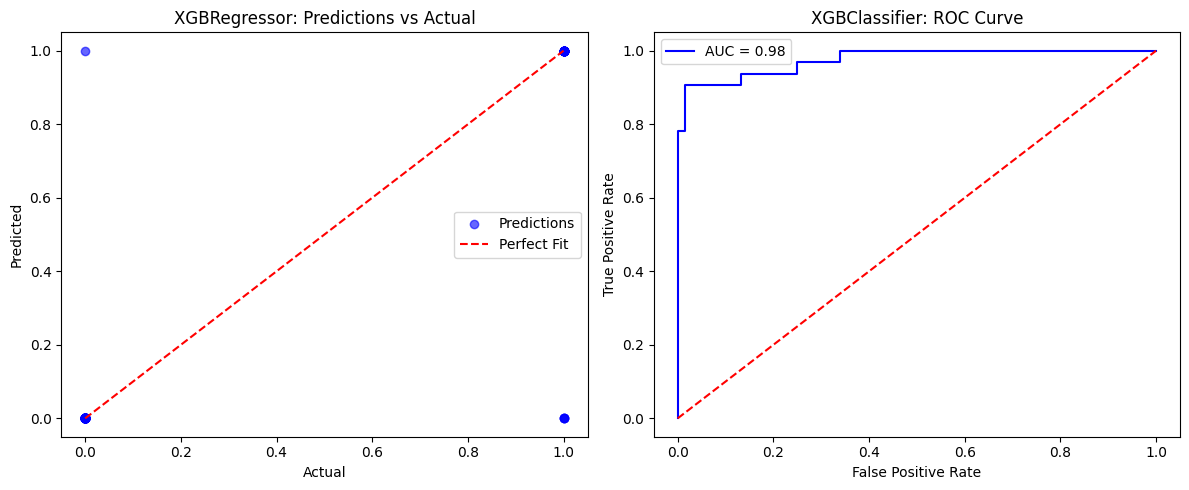

In [3]:
# ------------------------------
# XGBoost Regressor & Classifier
# Performance Metrics Demonstration
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss
)
from xgboost import XGBRegressor, XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# ============================
# Part 1: Regression
# ============================
print("\n--- XGBRegressor Evaluation ---")

# 1. Create regression dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=20, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 2. Train XGBRegressor
reg_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
reg_model.fit(X_train, y_train)

# 3. Predictions
y_pred = reg_model.predict(X_test)

# 4. Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# ============================
# Part 2: Classification
# ============================
print("\n--- XGBClassifier Evaluation ---")

# 1. Create classification dataset (binary)
X_clf, y_clf = make_classification(
    n_samples=500, n_features=10, n_informative=5,
    n_redundant=2, n_classes=2, weights=[0.7, 0.3], random_state=42
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 2. Train XGBClassifier
clf_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, use_label_encoder=False, eval_metric="logloss", random_state=42)
clf_model.fit(X_train, y_train)

# 3. Predictions
y_pred = clf_model.predict(X_test)
y_proba = clf_model.predict_proba(X_test)[:,1]  # probability for positive class

# 4. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
logloss = log_loss(y_test, y_proba)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")
print(f"Log Loss: {logloss:.2f}")

# ============================
# Visualization: Regression Predictions
# ============================
plt.figure(figsize=(12,5))

# Regression actual vs predicted
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBRegressor: Predictions vs Actual")
plt.legend()

# Classification ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBClassifier: ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()
